In [216]:
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torchvision.models import vgg16, VGG16_Weights
import os

In [354]:
classes = (
    'Rottweiler', 
    'Dachshund', 
    'Yorkshire_Terrier', 
    'Beagle', 
    'Golden_Retriever',
    'Poodle', 
    'Labrador_Retriever', 
    'German_Shepherd',
    'Boxer', 
    'Bulldog'
)

dict = {
    'Rottweiler' : 0, 
    'Dachshund' : 1, 
    'Yorkshire_Terrier': 2, 
    'Beagle' : 3, 
    'Golden_Retriever': 4,
    'Poodle' : 5, 
    'Labrador_Retriever': 6, 
    'German_Shepherd': 7,
    'Boxer': 8, 
    'Bulldog' : 9
}

In [51]:
data_path = ("./data/dataset")
folders = os.listdir(data_path)
dataset = []
for f in folders:
    img = os.listdir(data_path + "/" + f)
    for i in img:
        dataset.append((i, f))

In [53]:
dataset

[('Rottweiler_15.jpg', 'Rottweiler'),
 ('Rottweiler_29.jpg', 'Rottweiler'),
 ('Rottweiler_28.jpg', 'Rottweiler'),
 ('Rottweiler_14.jpg', 'Rottweiler'),
 ('Rottweiler_16.jpg', 'Rottweiler'),
 ('Rottweiler_17.jpg', 'Rottweiler'),
 ('Rottweiler_13.jpg', 'Rottweiler'),
 ('Rottweiler_12.jpg', 'Rottweiler'),
 ('Rottweiler_38.jpg', 'Rottweiler'),
 ('Rottweiler_10.jpg', 'Rottweiler'),
 ('Rottweiler_11.jpg', 'Rottweiler'),
 ('Rottweiler_39.jpg', 'Rottweiler'),
 ('Rottweiler_76.jpg', 'Rottweiler'),
 ('Rottweiler_89.jpg', 'Rottweiler'),
 ('Rottweiler_6.jpg', 'Rottweiler'),
 ('Rottweiler_88.jpg', 'Rottweiler'),
 ('Rottweiler_63.jpg', 'Rottweiler'),
 ('Rottweiler_77.jpg', 'Rottweiler'),
 ('Rottweiler_61.jpg', 'Rottweiler'),
 ('Rottweiler_75.jpg', 'Rottweiler'),
 ('Rottweiler_49.jpg', 'Rottweiler'),
 ('Rottweiler_4.jpg', 'Rottweiler'),
 ('Rottweiler_5.jpg', 'Rottweiler'),
 ('Rottweiler_74.jpg', 'Rottweiler'),
 ('Rottweiler_58.jpg', 'Rottweiler'),
 ('Rottweiler_64.jpg', 'Rottweiler'),
 ('Rottweiler_7

In [410]:
class DogBreedDataSet(Dataset):
    def __init__(self,root, transform = None):
        self.x = []
        self.y = []
        self.transform = transform
        self.root = root
        folders = os.listdir(root)
        for f in folders:
            img = os.listdir(root + "/" + f)
            for i in img:
                self.x.append(i)
                self.y.append(dict[f])
                
    def __len__(self):
        return len(self.x)
        
    def __getitem__(self,index):
        path = f"{self.root}/{classes[self.y[index]]}/{self.x[index]}"
        img = read_image(path)
        img = img.to(torch.float32) / 255.0
        if self.transform:
            img = self.transform(img)
        return (img, self.y[index])

    def show_img(self, index):
        path = f"{self.root}/{classes[self.y[index]]}/{self.x[index]}"
        img = read_image(path)
        plt.imshow(img.permute(1, 2, 0))
        plt.title(classes[self.y[index]])
        plt.show()
        

In [412]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to the target size
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
dataset = DogBreedDataSet("./data/dataset", transform)

In [414]:
dataset[9][0].shape

torch.Size([3, 64, 64])

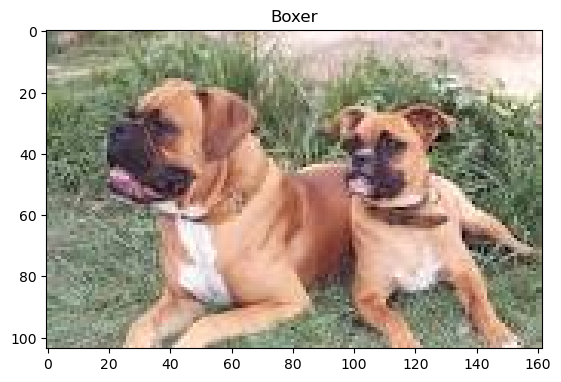

In [416]:
dataset.show_img(800)

In [384]:
len(dataset.x)

967

In [418]:
trainset = DataLoader(dataset, batch_size = 16 ,shuffle = True)

Build model

In [218]:
vgg16 = vgg16(pretrained=True)

/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/samu/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|████████████████████████████████████████| 528M/528M [02:05<00:00, 4.39MB/s]


In [224]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [388]:
num_classes = 10 

vgg16.classifier[6] = nn.Linear(4096, num_classes)

for param in vgg16.classifier[6].parameters():
    param.requires_grad = True


In [454]:
def train_one_epoch(model, trainset, optim, loss_fn):
    model.train()
    total_loss = 0
    for batch, (x,y) in enumerate(trainset):
        outputs = model(x)
        _, preds = torch.max(outputs, 1)
        preds = preds.to(torch.float64)
        y = y.to(torch.float64)
        print(preds.dtype)
        print(y.dtype)
        loss = loss_fn(outputs, y) 
        total_loss += loss
        optim.zero_grad()
        loss.backward()
        optim.step()

In [434]:
batch_size = 16
epochs = 10
lr = 0.001

optimizer = torch.optim.SGD(vgg16.classifier[6].parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

In [456]:
for epoch in range(epochs):
    train_one_epoch(vgg16, trainset, optimizer, loss_fn)

torch.float64
torch.float64


RuntimeError: expected scalar type Long but found Double